# STA 220 Assignment 1

## Name: Nikita Bhrugumaharshi Emberi

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. If test cases are given, your solution must be in the same format. 
5. The total number of points is 10. 

__Exercise 1__

Answer the following questions by querying [Lahman Baseball Database](http://seanlahman.com/). The 2019 version together with the description (`readme2019.txt`) are on Piazza. Answer the following questions. 

The purpose of this assignment is to practice accessing and analyzing data in a database. For full credit for (a) and (b), query the correct table with `pandas.read_sql` and a single SQL query. Unless otherwise specified, return in the same format of the test case. 

__(a, i)__ Which pitcher has the second most [home runs allowed](https://en.wikipedia.org/wiki/Home_runs_allowed) in the American League? __(ii)__ Which pitcher has the worst home runs allowed per game ratio? 

In [114]:
import numpy as np
import pandas as pd
import sqlite3 as sql

import io
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore")
import time

In [71]:
db = sql.connect("lahmansbaseballdb.sqlite")
db

### Printing the tables present in the database, because some of the tables are not present in README.txt

In [5]:
pd.read_sql("SELECT * FROM sqlite_master WHERE type = 'table'", db) 

,type,name,tbl_name,rootpage,sql
0,table,allstarfull,allstarfull,2,"CREATE TABLE ""allstarfull"" (\n\t""ID"" INTEGER N..."
1,table,appearances,appearances,151,"CREATE TABLE ""appearances"" (\n\t""ID"" INTEGER N..."
2,table,awardsmanagers,awardsmanagers,3436,"CREATE TABLE ""awardsmanagers"" (\n\t""ID"" INTEGE..."
3,table,awardsplayers,awardsplayers,3445,"CREATE TABLE ""awardsplayers"" (\n\t""ID"" INTEGER..."
4,table,awardssharemanagers,awardssharemanagers,3603,"CREATE TABLE ""awardssharemanagers"" (\n\t""ID"" I..."
5,table,awardsshareplayers,awardsshareplayers,3622,"CREATE TABLE ""awardsshareplayers"" (\n\t""ID"" IN..."
6,table,batting,batting,3757,"CREATE TABLE ""batting"" (\n\t""ID"" INTEGER NOT N..."
7,table,battingpost,battingpost,6554,"CREATE TABLE ""battingpost"" (\n\t""ID"" INTEGER N..."
8,table,collegeplaying,collegeplaying,7006,"CREATE TABLE ""collegeplaying"" (\n\t""ID"" INTEGE..."
9,table,divisions,divisions,7282,"CREATE TABLE ""divisions"" (\n\t""ID"" INTEGER NOT..."


__(a, i)__ Which pitcher has the second most [home runs allowed](https://en.wikipedia.org/wiki/Home_runs_allowed) in the American League?

In [11]:
# Based on the given definition of home runs allowed, I added the homeruns of a player and stored it in the variable `hra`
# Since we want the players of 'American League' and the joining factor of pitching table and leagues table is lgID (league ID),
# I used INNER JOIN to join pitching, leagues and people table to get name of the player and then sorted the values using hra in reverse 
# order
# `OFFSET 1` is used to get the pitcher who has the second most home runs allowed in the American League

result = pd.read_sql('''
SELECT SUM(HR) AS hra, * 
FROM pitching 
INNER JOIN 
people ON people.playerID = pitching.playerID
INNER JOIN 
leagues ON leagues.lgID = pitching.lgID
WHERE leagues.league = 'American League'
GROUP BY pitching.playerID
ORDER BY hra desc
LIMIT 1
OFFSET 1
''', db).squeeze()
print(result['nameFirst'] + " " + result['nameLast'] + " (" + str(result["hra"]) + ")")

Tim Wakefield (401)


__(a ii)__ Which pitcher has the worst home runs allowed per game ratio? 

In [91]:
# I'm joining tables pitching, leagues and people based on the same logic explained above
# Here since we want worst home runs allowed per game ratio, I am calculating this value by dividing hra with the number of games 
# played by the pitcher
# worst home runs for a pitcher would be maximum of Home_runs_allowed/number of games

results = pd.read_sql('''
SELECT SUM(pitching.HR)/sum(pitching.G) AS hra_ratio, * 
FROM
pitching INNER JOIN people 
ON 
people.playerID = pitching.playerID
INNER JOIN leagues 
ON 
leagues.lgID = pitching.lgID
WHERE leagues.league = 'American League'
GROUP BY pitching.playerID
HAVING hra_ratio = (SELECT MAX(hra_ratio) FROM (
        SELECT SUM(HR) / SUM(G) AS hra_ratio
        FROM pitching
        INNER JOIN leagues ON leagues.lgID = pitching.lgID
        WHERE leagues.league = 'American League'
        GROUP BY pitching.playerID
    ) AS max_hra_ratio)
ORDER BY hra_ratio desc
''', db).squeeze()

for index, result in results.iterrows():
    print(result['nameFirst'] + " " + result['nameLast'] + " (" + str(result["hra_ratio"]) + ")")

Chris Booker (3)
Manny Castillo (3)
Beiker Graterol (3)
Brett Jodie (3)
Bob Malloy (3)
Ralph McCabe (3)
Sam Narron (3)
John Perkovich (3)
Ryan Snare (3)


In [92]:
# To print any one player:
print(results.iloc[-1]['nameFirst'] + " " + results.iloc[-1]['nameLast'] + " (" + str(results.iloc[-1]["hra_ratio"]) + ")")

Ryan Snare (3)


__(b, i)__ Amongst all players in the American League that have passed, report their average lifespan in full years. __(ii)__ Return the six schools with most hall-of-fame alumni. __(iii)__ What fraction of managers have not been professional players?  

__(b, i)__ Amongst all players in the American League that have passed, report their average lifespan in full years. 

In [142]:
# average lifespan for passed players in the American League

# In order to get all the players in American League, I'm searching for all the players who might be present in pitching, batting
# fielding table
# Then calculating the span by substracting the year they were born in from the year they passed away

print(f"The average lifespan in full years in the American League:")
pd.read_sql('''
SELECT CEILING(AVG(deathYear - birthYear)) 
FROM people
WHERE 
playerID IN (
SELECT playerID
FROM pitching 
INNER JOIN 
leagues ON 
leagues.lgID = pitching.lgID
WHERE leagues.league = 'American League'
)
OR
playerID IN (
SELECT playerID
FROM batting
INNER JOIN 
leagues ON 
leagues.lgID = batting.lgID
WHERE leagues.league = 'American League'
)
OR
playerID IN (
SELECT playerID
FROM fielding
INNER JOIN 
leagues ON 
leagues.lgID = fielding.lgID
WHERE leagues.league = 'American League'
)
AND
deathYear > 0
''', db).squeeze()

The average lifespan in full years in the American League:


71.0

__(b ii)__ Return the six schools with most hall-of-fame alumni.

In [140]:
#Return the six schools with most hall-of-fame alumni. 

# 1) Grouped the data by schoolID to count hall-of-fame alumni for each school
# 2) Ordered the results by the count of hall-of-fame alumni in descending order
# 3) RetrieveD information for the top six schools with the most hall-of-fame alumni
# Here I used DISTINCT keyword to avoid duplicates that may form while joining the tables


result = pd.read_sql('''
SELECT count(DISTINCT collegeplaying.playerID) as cnt, schools.name_full
FROM schools 
INNER JOIN
collegeplaying 
ON schools.schoolID = collegeplaying.schoolID 
WHERE collegeplaying.playerID IN (
    SELECT DISTINCT playerID FROM halloffame
)
GROUP BY schools.schoolID
ORDER BY cnt desc
LIMIT 6
''', db).squeeze()
result

,cnt,name_full
0,13,University of Southern California
1,8,Arizona State University
2,6,"University of California, Los Angeles"
3,6,University of Michigan
4,6,University of Miami
5,5,University of Texas at Austin


I've added a filter for 'inducted' = 'Y' to align with the definition of induction found on Google, 
indicating a person listed in the hall of fame through a voting process. However, it's worth noting that 
'inducted' = 'N' might imply inclusion in the hall of fame through other means, as clarification is lacking in the readme.txt file. 
This adjustment ensures accuracy while considering potential variations in the data.

In [141]:
# This SQL query retrieves data related to the count of distinct player IDs from the 'collegeplaying' table who are inducted into `
# the hall of fame ('halloffame'). The results are grouped by school, ordered by the count in descending order, and limited to the 
# top 6 schools. 

result = pd.read_sql('''
SELECT count(DISTINCT collegeplaying.playerID) as cnt, schools.name_full
FROM schools 
INNER JOIN
collegeplaying 
ON schools.schoolID = collegeplaying.schoolID 
WHERE collegeplaying.playerID IN (
    SELECT DISTINCT playerID 
    FROM halloffame
    WHERE
    inducted = 'Y'
)
GROUP BY schools.schoolID
ORDER BY cnt desc
LIMIT 6
''', db).squeeze()
result

,cnt,name_full
0,3,University of Southern California
1,2,St. Bonaventure University
2,2,San Diego State University
3,2,University of Minnesota
4,2,University of Michigan
5,2,"Miami-Dade College, North Campus"


##### INCLUDING THE FOLLOWING CODE JUST FOR THE SAFETY, TO AVAOID CONFUSION WITH THE EXPECTED OUTPUT

In [97]:
#Return the six schools with most hall-of-fame alumni. 

result = pd.read_sql('''
SELECT count(halloffame.playerID) as cnt, schools.name_full
FROM halloffame
INNER JOIN 
collegeplaying
ON collegeplaying.playerID = halloffame.playerID
INNER JOIN
schools 
ON schools.schoolID = collegeplaying.schoolID 
GROUP BY schools.schoolID
ORDER BY cnt desc
LIMIT 6
''', db).squeeze()
result.head(30)

,cnt,name_full
0,64,University of Southern California
1,63,Concordia Theological Seminary
2,60,Eastern Kentucky University
3,56,University of Alabama
4,56,Oklahoma State University
5,46,University of Notre Dame


__(b iii)__ What fraction of managers have not been professional players?  

In [145]:
# A manager would not be a professional player if the manager's playerID is not present in batting, pitching and fielding tables 
# Using this logic, I calculated the number of such playerIDs from the manager's table as c1 (Again, using DISTINCT keyword to avoid duplicates
# that may be generated while taking playerIDs from three different tables)
# I also calculated the total number of managers as c2 from managers table. (DISTINCT keyword is used because a single manager may be managing 
# multiple teams and may be present multiple times)
# then I divided c1 with c2 to calculate the ratio

print(f"Fraction of managers who have not been professional players: ")
result = pd.read_sql('''
SELECT c1*1.0 / c2*1.0 FROM
((SELECT count(DISTINCT playerID) AS c1 FROM managers 
WHERE
playerID NOT IN (SELECT playerID FROM batting) 
AND 
playerID NOT IN (SELECT playerID FROM pitching) 
AND 
playerID NOT IN (SELECT playerID FROM fielding)) , 
(SELECT count(DISTINCT playerID) AS c2 FROM managers))
''', db).squeeze()
result

Fraction of managers who have not been professional players: 


0.17507002801120447

__(c)__ Create a world map with a color gradient corresponding to the log-number of players per country in the data set. Use `pandas.read_html` to retrieve the ISO codes from [wikipedia](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes), and merge those records as good as you can. Match no more than ten countries to their ISOs manually. 

In [66]:
# Scraping data from Wikipedia page containing ISO 3166 country codes
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes")[0]

# Selecting specific columns ('ISO 3166[1]', 'Country name[5]') and ('ISO 3166-1[2]', 'A-3 [5]')
df = tables.loc[:, [('ISO 3166[1]', 'Country name[5]'), ('ISO 3166-1[2]', 'A-3 [5]')]]

# Renaming the columns for clarity
df.columns = ['country_name', 'Code']

# Cleaning the 'country_name' column by removing square brackets, parentheses, and leading/trailing whitespaces
df['country_name'] = df['country_name'].str.replace(r'\[.*\]', '', regex=True).str.replace(r'\(.*\)', '', regex=True).str.strip()

# 1) Selecting the logarithm of the count of playerID as log, birthCountry as country_name, and count of playerId as cnt
# 2) Filtering out rows where birth country is NULL
# 3) Grouping the results by birth country
result = pd.read_sql('''
SELECT LOG(count(playerID)) as log, birthCountry as country_name, count(playerId) as cnt
FROM people
WHERE country_name IS NOT NULL
GROUP BY country_name
''', db).squeeze()

# Merging the player statistics DataFrame with the ISO 3166 country codes DataFrame based on the 'country_name' column
merged_df = pd.merge(result, df, on = 'country_name', how = 'left')
merged_df

,log,country_name,cnt,Code
0,0.000000,Afghanistan,1,AFG
1,0.000000,American Samoa,1,ASM
2,0.698970,Aruba,5,ABW
3,0.000000,At Sea,1,NaN
4,1.491362,Australia,31,AUS
5,0.602060,Austria,4,AUT
6,0.778151,Bahamas,6,BHS
7,0.000000,Belgium,1,BEL
8,0.000000,Belize,1,BLZ
9,0.698970,Brazil,5,BRA


In [67]:
# Filtering rows in the DataFrame 'merged_df' where the 'Code' column is NaN 

merged_df[merged_df['Code'].isna()]

,log,country_name,cnt,Code
3,0.000000,At Sea,1,NaN
10,2.406540,CAN,255,NaN
14,1.176091,Curacao,15,NaN
15,0.778151,Czech Republic,6,NaN
16,2.881385,D.R.,761,NaN
33,1.079181,Netherlands,12,NaN
36,2.428135,P.R.,268,NaN
42,0.954243,Russia,9,NaN
47,1.361728,South Korea,23,NaN
52,4.236890,USA,17254,NaN


In [69]:
# Since there are 12 such columns whose iso code could not be matched using code, 
# I'm manually mapping 10 countries, because 2 out of 12 country's code wasn't present in wikipedia page.

manual_iso_mapping = {
    'CAN' : 'CAN',
    'Curacao': 'CUW',
    'Czech Republic': 'CZE',
    'France': 'FRA',
    'Netherlands': 'NLD',
    'Russia': 'RUS',
    'USA': 'USA',
    'United Kingdom': 'GBR',
    'V.I.': 'VIR',
    'South Korea': 'KOR'
}

# Checking the exact column name in merged_df
code_column_name = 'Code'  # Replacing with the correct column name

# Updating the 'Code' column based on the manual ISO mappings
for country, iso_code in manual_iso_mapping.items():
    merged_df.loc[merged_df['country_name'] == country, code_column_name] = iso_code

# Printing the modified DataFrame
merged_df

,log,country_name,cnt,Code
0,0.000000,Afghanistan,1,AFG
1,0.000000,American Samoa,1,ASM
2,0.698970,Aruba,5,ABW
3,0.000000,At Sea,1,NaN
4,1.491362,Australia,31,AUS
5,0.602060,Austria,4,AUT
6,0.778151,Bahamas,6,BHS
7,0.000000,Belgium,1,BEL
8,0.000000,Belize,1,BLZ
9,0.698970,Brazil,5,BRA


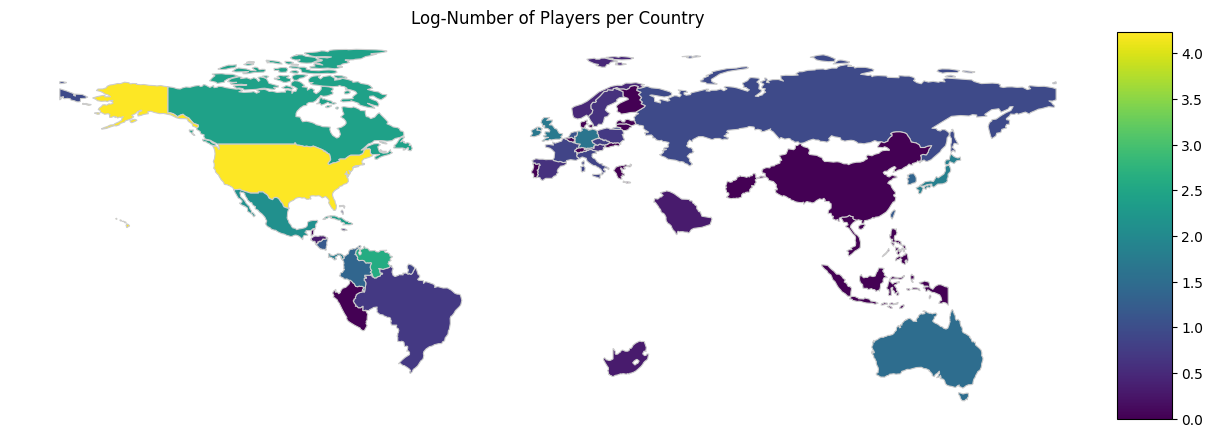

In [70]:
# 1) Selecting the logarithm of the count of playerID as log, birthCountry, and count of playerId as cnt
# 2) Excluding rows where birth country is NULL
# 3) Grouping the results by birth country

result = pd.read_sql('''
SELECT LOG(count(playerID)) as log, birthCountry, count(playerId) as cnt
FROM people
WHERE birthCountry IS NOT NULL
GROUP BY birthCountry
''', db).squeeze()


# Assuming 'world' is a GeoDataFrame with world country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging data with GeoDataFrame
merged_data = world.merge(merged_df, how='left', left_on='iso_a3', right_on='Code')
# merged_data['log'] = merged_data['log'].fillna(-1)

# Creating the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plotting the map with a color gradient
merged_data.plot(column='log', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)

# Customizing plot
ax.set_title('Log-Number of Players per Country')
ax.set_axis_off()

# Showing the plot
plt.show()

In [152]:
# Closing the database connection
db.close()

__Exercise 2__

We will use the [lichess](https://lichess.org/api) API to retrieve some information about the current state of chess in the world. In order to answer below questions, make precise and economical requests. You may use:
```
import requests
import json
import pandas

from datetime import datetime
```

In [100]:
# Importing the required libraries

import requests
import json
import pandas

from datetime import datetime
import json
import io

__(a)__ What is the real name of the leader of the blitz leaderboard? 

In [104]:
# Making a GET request to the Lichess API to retrieve the top player in the blitz leaderboard
response = requests.get("https://lichess.org/api/player/top/1/blitz")

# Parsing the response as JSON to obtain the leaderboard data
leaderboard = response.json()

# Extracting the Lichess user ID of the top player from the leaderboard data
leaderboard['users'][0]['id']

# Defining the URL for the Lichess API to retrieve user information
url = "https://lichess.org/api/users"

# Replacing with the actual user IDs separated by commas
user_ids = leaderboard['users'][0]['id']  

# Making the POST request with the user IDs in the request body
response = requests.post(url, data=user_ids)

# Raising an exception if the request was not successful
response.raise_for_status()

# Parsing the response as JSON to obtain user information
result = response.json()

# Printing the real name of the top player in the blitz leaderboard
print(f"Real name of the leader of the blitz leaderboard: '{result[0]['profile']['firstName']} {result[0]['profile']['lastName']}'")

Real name of the leader of the blitz leaderboard: 'Vladislav Artemiev'


__(b, i)__ Get the username of the last player that played a rapid game against user `athena-pallada`. __(ii)__ In all games against this user, how many times did `athena-pallada` win? _(Provide code that answers the question in case more than just a single game is returned)_

In [111]:
# This function, ndjson_to_list, takes an NDJSON (Newline Delimited JSON) string as input and converts it into a list of dictionaries. 
# It uses the io.StringIO class to simulate a file-like object and the json.loads() method to parse each line of the NDJSON string. 
# The comments provide a clear explanation of each step within the function.
    
def ndjson_to_list(ndjson_string):
    # Creating a list to store parsed JSON objects
    parsed_objects = []

    # Using StringIO to simulate a file-like object
    buffer = io.StringIO(ndjson_string)

    # Iterating through lines in the ndjson string
    for line in buffer:
        # Parsing each line and append the result to the list
        parsed_objects.append(json.loads(line))

    return parsed_objects

__(b, i)__ Get the username of the last player that played a rapid game against user `athena-pallada`.

In [113]:
# Initializing an empty string variable to store the answer
answer = ""

# Defining the URL for retrieving the latest rapid game played by the user 'athena-pallada'
url = "https://lichess.org/api/games/user/athena-pallada" 

# Setting parameters for the API request, specifying the performance type as 'rapid' and maximum number of games as 1 beacuse
# the results retrieved are sorted by deafult giving the information about the latest game played
params = {
    "perfType" : "rapid",
    "max": 1
}

# Specifying headers to accept the response in x-ndjson format
headers = {'Accept': 'application/x-ndjson'}

# Making the POST request with the user IDs in the request body
response = requests.get(url, params = params, headers = headers)

# Converting x-ndjson to list of dictionaries
parsed_objects = ndjson_to_list(response.text)

# Sorting the list of games based on the 'lastMoveAt' timestamp in reverse order
sorted_answer = sorted(parsed_objects, key=lambda x: x['lastMoveAt'], reverse=True)

# Determining the opponent's username based on the color of the player in the latest game
if sorted_answer[0]['players']['white']['user']['name'] != 'athena-pallada':
    answer = sorted_answer[0]['players']['white']['user']['name']
else:
    answer = sorted_answer[0]['players']['black']['user']['name']

print(f"The username of the last player that played a rapid game against user `athena-pallada` is '{answer}'")

The username of the last player that played a rapid game against user `athena-pallada` is 'Bacio129'


__(b ii)__ In all games against this user, how many times did `athena-pallada` win? _(Provide code that answers the question in case more than just a single game is returned)_

In [144]:
# Constructing the URL for the Lichess API to retrieve the crosstable information for games between 'athena-pallada' and the latest opponent
url = f"https://lichess.org/api/crosstable/athena-pallada/{answer}"  

# Making a GET request to the Lichess API with additional parameters for matchup information
response = requests.get(url, params = {
    "matchup" : True,
})

# Raising an exception if the request was not successful
response.raise_for_status()

# Parsing the response as JSON to obtain crosstable information
result = response.json()

# Extracting and printing the username of the last player that played a rapid game against user 'athena-pallada'
print(f"In all games against `Bacio129`, `athena-pallada` won '{result['users']['athena-pallada']}' times")

In all games against `Bacio129`, `athena-pallada` won '2' times


__(c)__ Consider the top ten players in the bullet leaderboard. __(i)__ Which player has the most bullet games overall? __(ii)__ Which player has played the most bullet games relative to account age in days? __(iii)__ Which player has the worst win-to-loss ratio over all formats?

In [120]:
# Defining the URL for the Lichess API to retrieve the top 10 players in bullet
url = "https://lichess.org/api/player/top/10/bullet"  

# Making a GET request to the Lichess API to get the top 10 players
response = requests.get(url)

# Raising an exception if the request was not successful
response.raise_for_status()

# Parsing the response as JSON to obtain player information
result = response.json()

# Extract relevant data and creating a DataFrame (df1)
data = [
    {'id': user['id'], 'username': user['username'],
     'rating': user['perfs']['bullet']['rating'] if 'perfs' in user and 'bullet' in user['perfs'] else None,
     'progress': user['perfs']['bullet']['progress'] if 'perfs' in user and 'bullet' in user['perfs'] else None,
    }
    for user in result['users']
]

df1 = pd.DataFrame(data)

##################################################################################################################### 

# Initializing an empty list to store individual performance data
data = []


# Iterating through rows of df1 and making API requests to get individual performance statistics
for index, row in df1.iterrows():
    # Introducing a small delay to avoid rate limiting
    time.sleep(0.05) 
    response = requests.get(f"https://lichess.org/api/user/{row['username']}/perf/bullet")

    result = response.json()
    user_data = {
        'username': row['username'],
        'win': result['stat']['count']['win'],
        'loss': result['stat']['count']['loss'],
        'all': result['stat']['count']['all']
    } 
    data.append(user_data)

# Creating a new DataFrame (df2) with individual performance data
df2 = pd.DataFrame(data)
#####################################################################################################################

# Merging the two DataFrames on the 'username' column
merged_df = pd.merge(df1, df2, on='username')

#####################################################################################################################

# Initializing an empty list to store additional user data
data = []

# Defining the URL for retrieving detailed user information
url = "https://lichess.org/api/users"

# Iterating through rows of merged_df and making API requests to get detailed user information
for index, row in merged_df.iterrows():
    # Introducing a small delay to avoid rate limiting
    time.sleep(0.05) 
    response = requests.post(url, row['id'])

    result = response.json()
    user_data = {
        'username': row['username'],
        'createdAt': result[0]['createdAt'],
    } 
    data.append(user_data)

# Creating a new DataFrame (df3) with additional user data
df3 = pd.DataFrame(data)

#####################################################################################################################
# Merging the two DataFrames on the 'username' column to create final dataframe
final_df = pd.merge(merged_df, df3, on='username')
final_df

,id,username,rating,progress,win,loss,all,createdAt
0,ediz_gurel,Ediz_Gurel,3301,26,3378,1475,5259,1678897786697
1,redwarrior25,RedWarrior25,3223,-20,576,128,739,1559415053040
2,mishka_the_great,Mishka_The_Great,3204,20,36665,21636,61543,1517595616793
3,v_m,V_M,3171,16,1495,828,2491,1459879941051
4,klari64,klari64,3167,23,1556,1043,2813,1545320573092
5,yulkaaa,Yulkaaa,3165,8,462,226,767,1673030428077
6,hooligan64,Hooligan64,3163,-21,2148,1171,3541,1650532129100
7,watneg,Watneg,3158,9,2517,1238,4242,1545684336272
8,aaryan_varshney,aaryan_varshney,3150,29,4844,2266,7774,1555866544962
9,lastgladiator2,LastGladiator2,3142,8,1732,1099,3006,1597157317472


In [132]:
# This function, get_user_name, takes a Lichess username as input, makes a request to the Lichess API to retrieve detailed user information, 
# and returns the JSON response containing the user details. The comments provide a brief explanation of each step in the function.

def get_user_name(username):
    url = "https://lichess.org/api/users"
    response=requests.get(f"https://lichess.org/api/user/{username}")
    result = response.json()
    return result

__(c)__ Consider the top ten players in the bullet leaderboard. 
__(i)__ Which player has the most bullet games overall?

In [146]:
# Finding the player with the most bullet games overall in the final_df DataFrame
most_games_player = final_df.loc[final_df['all'].idxmax(), 'username']

# Defining the URL for detailed user information
url = "https://lichess.org/api/users"

# To get detailed user information for the player with the most games
result = get_user_name(most_games_player )

# Printing information about the player with the most bullet games overall
print(f'''The player with the most bullet games overall is: "{most_games_player}" with {final_df.loc[final_df['all'].idxmax(), 'all']} Games
The full name is: "{result['profile']['firstName']} {result['profile']['lastName']}"''')

The player with the most bullet games overall is: "Mishka_The_Great" with 61543 Games
The full name is: "Mieszko Miś"


__(c)__ Consider the top ten players in the bullet leaderboard. 
__(ii)__ Which player has played the most bullet games relative to account age in days? 

In [147]:
# Converting 'created_at' to datetime
final_df['createdAt'] = pd.to_datetime(final_df['createdAt'], unit='ms')

# Calculating account age in days
final_df['account_age_days'] = (pd.to_datetime('now') - final_df['createdAt']).dt.days

# Calculating the ratio of bullet games to account age in days
final_df['games_ratio'] = final_df['all'] / final_df['account_age_days']

# Finding the player with the highest games ratio
most_relative_games_player = final_df.loc[final_df['games_ratio'].idxmax(), 'username']

# To get detailed user information for the player with the most bullet games relative to account age in days
result = get_user_name(most_relative_games_player)

print(f'''The player who played the most relative to account age is: "{most_relative_games_player}" 
with relative account age as: {final_df.loc[final_df['games_ratio'].idxmax(), 'games_ratio']} 
The full name is: "{result['profile']['firstName']} {result['profile']['lastName']}"''')

The player who played the most relative to account age is: "Mishka_The_Great" 
with relative account age as: 28.179029304029303 
The full name is: "Mieszko Miś"


__(c)__ Consider the top ten players in the bullet leaderboard.
__(iii)__ Which player has the worst win-to-loss ratio over all formats?

In [148]:
# Calculating win-to-loss ratio
final_df['win_loss_ratio'] = final_df['win'] / final_df['loss']

# Finding the player with the worst win-to-loss ratio
worst_ratio_player = final_df.loc[final_df['win_loss_ratio'].idxmin(), 'username']

# To get detailed user information for the player who has the worst win-to-loss ratio
result = get_user_name(worst_ratio_player)


print(f'''The player with the worst win-to-loss ratio is: "{worst_ratio_player}". 
win:loss ratio : {final_df.loc[final_df['win_loss_ratio'].idxmin(), 'win_loss_ratio']}
The full name is: "{result['profile']['firstName']} {result['profile']['lastName']}"''')

The player with the worst win-to-loss ratio is: "klari64". 
win:loss ratio : 1.491850431447747
The full name is: "Tobias Kölle"


__(d)__ Get all games from user `manwithavan`. Group them by opening and print the ten most popular. 

In [139]:
# Defining the URL for retrieving games played by the user 'manwithavan' with opening information
url = "https://lichess.org/api/games/user/manwithavan"  

# Setting parameters for the API request, including the option to include opening information
params = {
    "opening" : True
}

# Specifying headers to accept the response in x-ndjson format
headers = {
    "Accept" : "application/x-ndjson"
}

# Making a GET request to the Lichess API with the specified parameters and headers
response = requests.get("https://lichess.org/api/games/user/manwithavan" , params = params, headers = headers)

# Converting x-ndjson to list of dictionaries
parsed_objects = ndjson_to_list(response.text)

# Extracting opening information and creating a DataFrame
data = []

for obj in parsed_objects:
    if 'opening' in obj:
        data.append(obj['opening'])

df = pd.DataFrame(data)

# Displaying the top 10 most frequently played openings
df['name'].value_counts().head(10)

name
Van't Kruijs Opening                                 7
Nimzo-Larsen Attack: Modern Variation                7
Pirc Defense                                         6
Mieses Opening                                       6
Caro-Kann Defense: Breyer Variation                  5
Modern Defense                                       5
Queen's Pawn Game                                    5
Nimzo-Larsen Attack                                  5
Zukertort Opening: Queenside Fianchetto Variation    5
Zukertort Opening: Kingside Fianchetto               5
Name: count, dtype: int64

In [295]:
openings.value_counts().head(2)

Van't Kruijs Opening                     7
Nimzo-Larsen Attack: Modern Variation    7
dtype: int64

# Acknowledgment
I received assistance from `ChatGPT` while working on certain questions in this notebook. I want to clarify that I independently completed the majority of the tasks, seeking help only in instances where I encountered challenges or felt lost. The collaboration with ChatGPT was instrumental in providing guidance and insights during those moments.
ChatGpt: https://chat.openai.com/

--- Nikita Bhrugumaharshi Emberi